## ESA 8: ML Introduction Exercise
By Aaliyah Roderer

Use the fish dataset to predict the weight of the fish based on various features.



#### Features:

- **Species**: The species name of the fish.

- **Length1**: Vertical length in cm.

- **Length2**: Diagonal length in cm.

- **Length3**: Cross length in cm.n

- **Height**: Height in cm.

- **Width**: Diagonal width in cm.

- **Weight**: Weight of the fish in grams (g).

### Data Preparation

- Clean the dataset if necessary before analysis. 

Das Datenset wurde manuell gesichtet, da es sich nur um 160 Zeilen handelte. Dabei kam ich zu dem Schluss, dass das Datenset nicht gesäubert werden muss, zur Vollständigkeit habe ich im folgenden jedoch dennoch ausgeführt, wie eine Säuberung aussehen könnte. Außerdem mussten den Spezien nummerische Werte über Labels zugeordnet werden.

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv'
fish_data = pd.read_csv(url)

print(fish_data.isnull().sum())


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [66]:
fish_data_clean = fish_data[
    (fish_data['Species'].notna()) &
    (fish_data['Length1'].apply(lambda x: isinstance(x, (int, float)))) & (fish_data['Length1'] > 0) &
    (fish_data['Length2'].apply(lambda x: isinstance(x, (int, float)))) & (fish_data['Length2'] > 0) &
    (fish_data['Length3'].apply(lambda x: isinstance(x, (int, float)))) & (fish_data['Length3'] > 0) &
    (fish_data['Height'].apply(lambda x: isinstance(x, (int, float)))) & (fish_data['Height'] > 0) &
    (fish_data['Width'].apply(lambda x: isinstance(x, (int, float)))) & (fish_data['Width'] > 0)
]

print(fish_data_clean.head())


label_encoder = LabelEncoder()
fish_data_clean['Species'] = label_encoder.fit_transform(fish_data_clean['Species'])

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


### Task 1

1. Split the dataset randomly into training (70%) and testing (30%) sets. 

In [67]:
X = fish_data_clean[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = fish_data_clean['Weight']

trainX, testX, trainY, testY=train_test_split(X,y, test_size = 0.3, random_state=30)

print("trainX:", trainX.shape,"testX:",  testX.shape, "trainY:", trainY.shape, "testY:", testY.shape)
print()

trainX: (111, 6) testX: (48, 6) trainY: (111,) testY: (48,)



2. Apply the following models:

   - Linear Regression 

   - Random Forest 
   

In [68]:
# Linear Regression
reg_lin = LinearRegression()
reg_lin.fit(trainX, trainY)
reg_lin_pred = reg_lin.predict(testX)

a = reg_lin.coef_
b = reg_lin.intercept_

In [69]:
# Random Forest 
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(trainX, trainY)
reg_rf_pred = reg_rf.predict(testX)

3. Calculate RMSE (Root Mean Squared Error) and  R2 (Coefficient of Determination) on the test set. 

In [70]:
# Linear Regression
rmse_lin = np.sqrt(mean_squared_error(testY, reg_lin_pred))
r2_lin = r2_score(testY, reg_lin_pred)

# Random Forest
rmse_rf = mean_squared_error(testY, reg_rf_pred, squared=False)
r2_rf = r2_score(testY, reg_rf_pred)  # R^2

print("Linear Regression - RMSE: ", rmse_lin ,", R2: ", r2_lin)
print("Random Forest - RMSE: ", rmse_rf, ", R2: ",r2_rf)

Linear Regression - RMSE:  125.63817327978869 , R2:  0.8935875538370197
Random Forest - RMSE:  62.845134429250415 , R2:  0.9733748220476521


4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.

<Figure size 1200x600 with 0 Axes>

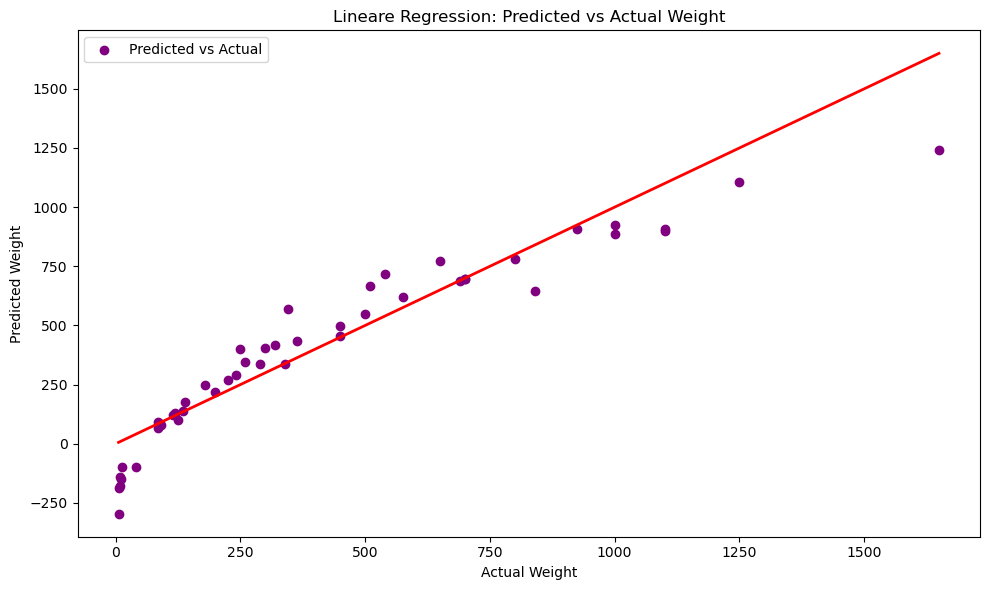

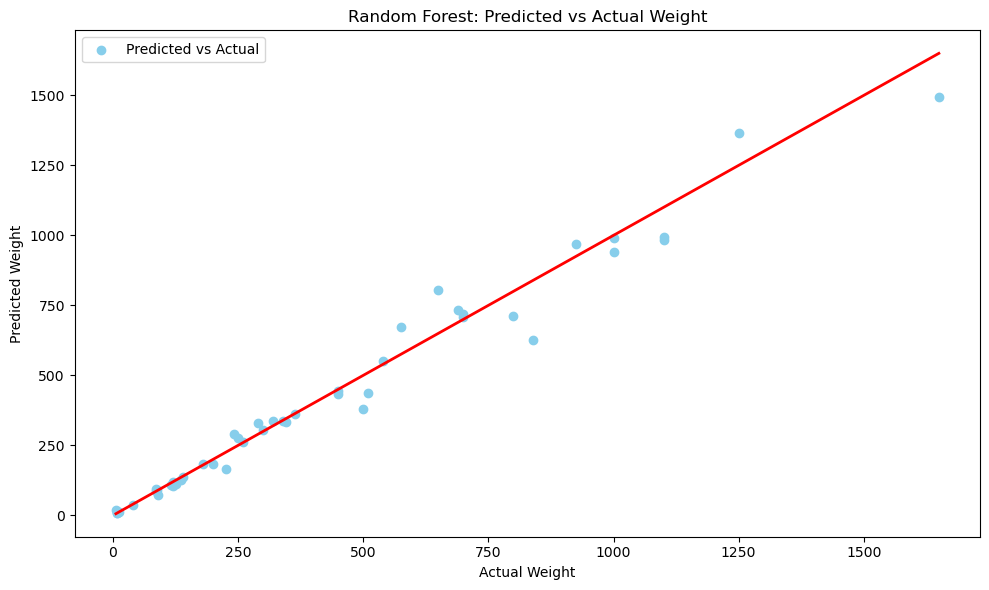

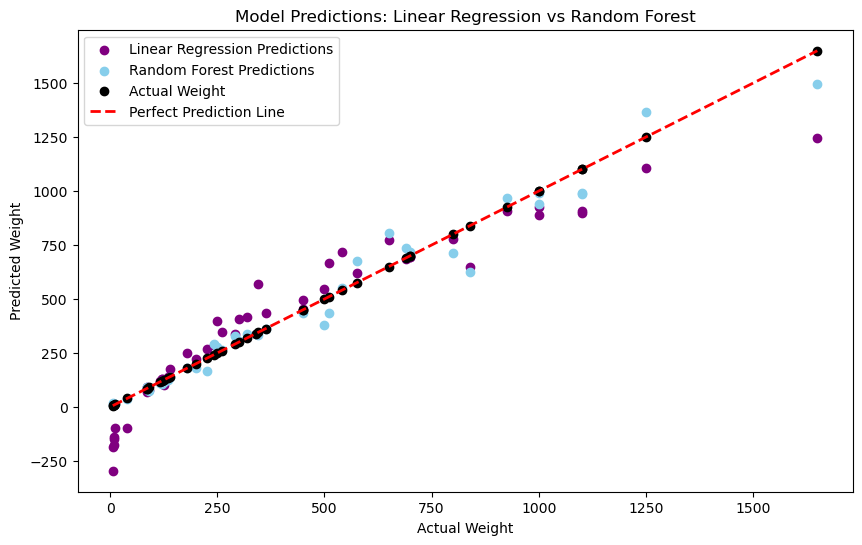

In [71]:
# Visualize predictions
plt.figure(figsize=(12, 6))

# Plotting Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_lin_pred, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Lineare Regression: Predicted vs Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2)  # Perfect prediction line
plt.legend()

plt.tight_layout()
plt.show()

# Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_rf_pred, color='skyblue', label='Predicted vs Actual')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Predicted vs Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2)  # Perfect prediction line
plt.legend()

plt.tight_layout()
plt.show()


# Summary
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_lin_pred, color='purple', label='Linear Regression Predictions')
plt.scatter(testY, reg_rf_pred, color='skyblue', label='Random Forest Predictions')
plt.scatter(testY, testY, color='black', label='Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2, linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Model Predictions: Linear Regression vs Random Forest')
plt.legend()
plt.show()

Um einen besseren Vergleich vornehmen zu können habe ich einen dritten Plot ausgegeben, wo sowohl die Werte aus der Lineraren und der Random Forest Regression zu sehen sind. Außerdem ist mit einer roten Linie und den schwarzen Punkten verdeutlicht wo die eigentlichen Werte liegen müssten. Basierend auf dem Diagram kässt sich sagen, dass Random Forest etwas besser abschneidet.

5. Provide your opinion on which metric, RMSE or  R2, is more appropriate in this case.

Meiner Meinung nach ist RMSE hier eher angemessen, da sie eine direkte Vorstellung von der durchschnittlichen Fehlergröße in den gleichen Einheiten wie das Ziel (Gewicht in Gramm) gibt. Dies macht es einfacher zu interpretieren, wie gut das Modell in praktischen Anwendungen funktioniert.

Bei praktischen Anwendungen wie der Vorhersage des Fischgewichts auf der Grundlage bestimmter Merkmale bietet der RMSE daher ein klareres und direkter anwendbares Maß für die Modellleistung. Er entspricht dem Ziel, den Vorhersagefehler auf eine Weise zu minimieren, die leicht verständlich und interpretierbar ist.

### Task 2

1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv'
fish_data = pd.read_csv(url)


fish_data['Species'] = label_encoder.fit_transform(fish_data['Species'])


def split_by_species(data, species_col, test_size=0.3, random_state=30):
    train_data = pd.DataFrame(columns=data.columns)
    test_data = pd.DataFrame(columns=data.columns)
    
    species_list = data[species_col].unique()
    
    for species in species_list:
        species_data = data[data[species_col] == species]
        train_species, test_species = train_test_split(species_data, test_size=test_size, random_state=random_state)
        train_data = pd.concat([train_data, train_species])
        test_data = pd.concat([test_data, test_species])
    
    return train_data, test_data

train_data, test_data = split_by_species(fish_data, 'Species', test_size=0.3, random_state=30)

trainX = train_data[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
trainY = train_data['Weight']
testX = test_data[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
testY = test_data['Weight']

print("trainX:", trainX.shape, "testX:", testX.shape, "trainY:", trainY.shape, "testY:", testY.shape)

trainX: (108, 6) testX: (51, 6) trainY: (108,) testY: (51,)


2. Apply the following models:

   - Linear Regression 

   - Random Forest 

In [83]:
# Linear Regression
reg_lin = LinearRegression()
reg_lin.fit(trainX, trainY)
reg_lin_pred = reg_lin.predict(testX)

a = reg_lin.coef_
b = reg_lin.intercept_

In [84]:
# Random Forest 
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(trainX, trainY)
reg_rf_pred = reg_rf.predict(testX)

3. Calculate RMSE (Root Mean Squared Error) and  R2 (Coefficient of Determination) on the test set. 

In [85]:
# Linear Regression
rmse_lin = np.sqrt(mean_squared_error(testY, reg_lin_pred))
r2_lin = r2_score(testY, reg_lin_pred)

# Random Forest
rmse_rf = mean_squared_error(testY, reg_rf_pred, squared=False)
r2_rf = r2_score(testY, reg_rf_pred)  # R^2

print("Linear Regression - RMSE: ", rmse_lin ,", R2: ", r2_lin)
print("Random Forest - RMSE: ", rmse_rf, ", R2: ",r2_rf)

Linear Regression - RMSE:  118.51259872597066 , R2:  0.8454068369191532
Random Forest - RMSE:  75.50515334245716 , R2:  0.937249899126499


4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.

<Figure size 1200x600 with 0 Axes>

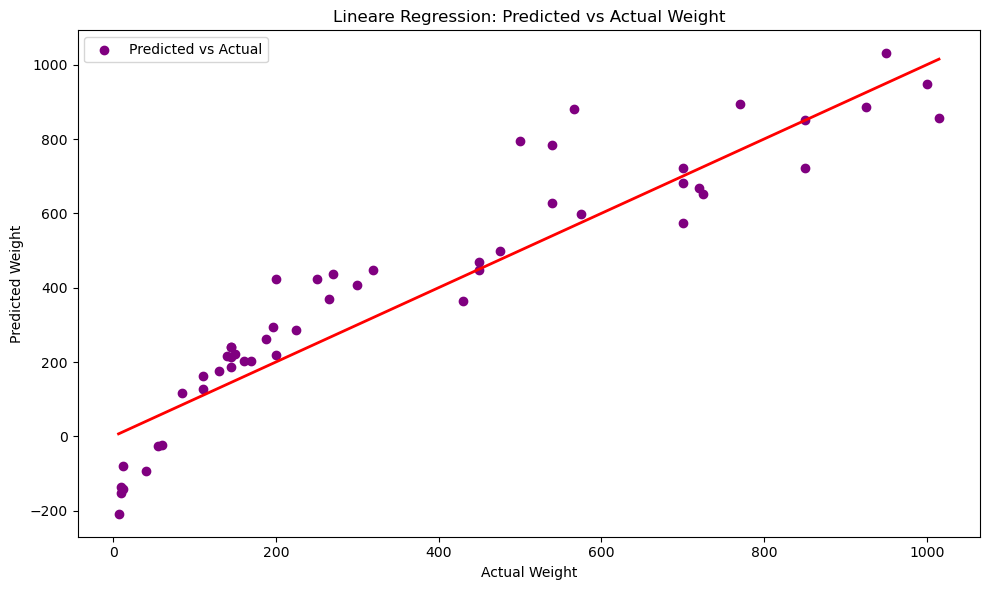

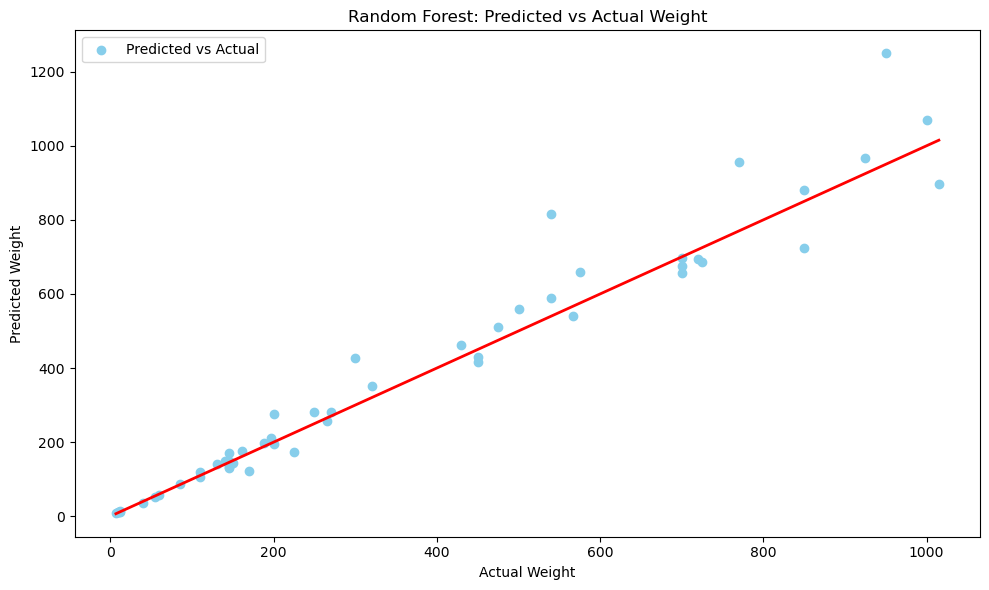

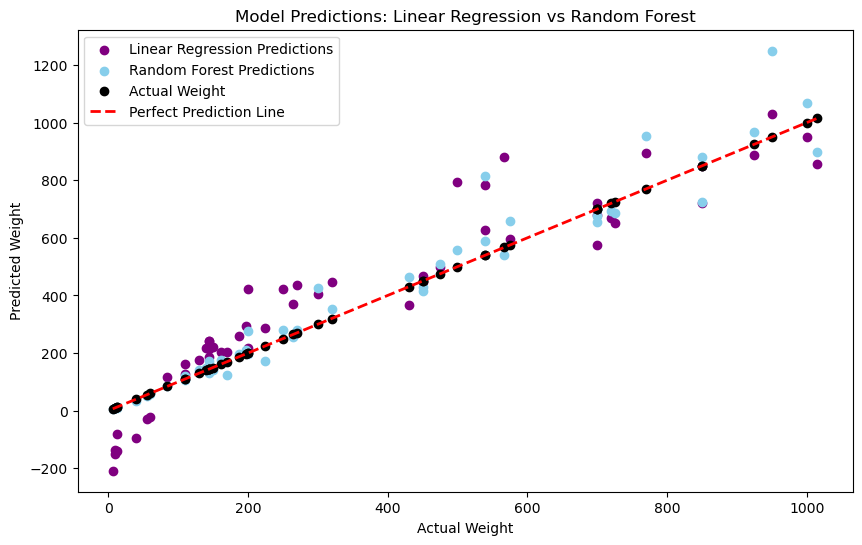

In [86]:
# Visualize predictions
plt.figure(figsize=(12, 6))

# Plotting Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_lin_pred, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Lineare Regression: Predicted vs Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2)  # Perfect prediction line
plt.legend()

plt.tight_layout()
plt.show()

# Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_rf_pred, color='skyblue', label='Predicted vs Actual')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Predicted vs Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2)  # Perfect prediction line
plt.legend()

plt.tight_layout()
plt.show()


# Summary
plt.figure(figsize=(10, 6))
plt.scatter(testY, reg_lin_pred, color='purple', label='Linear Regression Predictions')
plt.scatter(testY, reg_rf_pred, color='skyblue', label='Random Forest Predictions')
plt.scatter(testY, testY, color='black', label='Actual Weight')
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', lw=2, linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Model Predictions: Linear Regression vs Random Forest')
plt.legend()
plt.show()

Die Werte hier unterscheiden sich eindeutig von den Ergebnissen aus Task 1

### Comparison

- Compare the results obtained from Task 1 and Task 2.

### Vergleich

##### Lineare Regression:
- RMSE: Aufgabe 2 (118,51) < Aufgabe 1 (125,64) - Ein niedrigerer RMSE weist auf eine bessere Leistung bei Aufgabe 2 hin
- R2: Aufgabe 2 (0,845) < Aufgabe 1 (0,894) - Ein niedrigeres R2 weist auf eine etwas schlechtere Anpassung in Aufgabe 2 hin.

##### Random Forest:
- RMSE: Aufgabe 2 (75.51) > Aufgabe 1 (62.85) - Ein höherer RMSE zeigt eine schlechtere Leistung in Aufgabe 2 an.
- R2: Aufgabe 2 (0,937) < Aufgabe 1 (0,973) - Ein niedrigeres R2 weist auf eine schlechtere Anpassung in Aufgabe 2 hin.


### Schlussfolgerung:

##### Lineare Regression:
Aufgabe 2 zeigt eine leichte Verbesserung mit einem niedrigeren RMSE im Vergleich zu Aufgabe 1, was auf eine bessere Vorhersagegenauigkeit hindeutet, wenn die Artenverteilung in den Trainings- und Testsätzen ausgeglichen ist. Aufgabe 1 schnitt jedoch mit einem höheren R2 besser ab, was auf eine insgesamt bessere Anpassung an die Daten hindeutet. Das niedrigere R2 von Aufgabe 2 könnte auf eine weniger optimale Modellanpassung hindeuten, möglicherweise aufgrund der geringeren Trainingsgröße pro Art.

##### Random Forest:
Aufgabe 2 zeigt einen höheren RMSE im Vergleich zu Aufgabe 1, was auf eine schlechtere Vorhersagegenauigkeit hindeutet. Dies könnte darauf zurückzuführen sein, dass die geringere Trainingsgröße pro Art die Fähigkeit des Modells zur Generalisierung beeinträchtigt. Ähnlich wie bei der linearen Regression hatte Aufgabe 1 ein höheres R2, was auf eine bessere Gesamtanpassung an die Daten im Vergleich zu Aufgabe 2 hindeutet.


### Gesamtbeurteilung:
Aufgabe 2, die darauf abzielte, die Artenverteilung zwischen Trainings- und Testsätzen auszugleichen, zeigt im Allgemeinen gemischte Ergebnisse im Vergleich zu Aufgabe 1: Die lineare Regression profitierte leicht in Bezug auf den RMSE, hatte  aber einen Rückgang des R2, was auf einen Kompromiss zwischen Vorhersagegenauigkeit und Modellanpassung hinweist. Random Forest zeigte einen deutlichen Anstieg des RMSE und einen Rückgang von R2, was darauf hindeutet, dass die Modellleistung unter den eingeschränkteren Trainingsdaten pro Art litt.
In der Praxis ist der Ausgleich der Artenverteilung in Aufgabe 2 zwar theoretisch vorteilhaft, die tatsächlichen Auswirkungen auf die Modellleistung können jedoch variieren. Basierend auch auf den Diagrammen würde ich sagen, dass die ersten Modelle besser funktioniert haben als die zweiten.

### Extra Point

- point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again) 

Hyperparameter: Die Hyperparameter wie beispielsweise Baumtiefe bei Random Forest könnten angepasst werden.

Datenaufteilung: Eventuell hilft auch das ausarbeiten einer besseren Strategie für die Aufteilung der Daten.
-> In diesem Schritt könnte beispielsweise das einsetzen von Kreuzvalidierung helfen.

Ausreißer: Es sollte eine Methode impementiert werden um mit Ausreißern in den Daten besser umgehen zu können

Feature Bewertung: Zuletzt könnten die Feature untersucht werden um irrelevante oder weniger wichtige Features zu identifizieren und zu eliminieren.